In [1]:
# preprocessing.py
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('tanzania_climate_data.csv')  # Update with your actual filename

# Preview the dataset
print("🔹 Data Preview:")
print(df.head())

# Basic info
print("\n🔹 Data Info:")
print(df.info())

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# --- Handling Missing Values ---
# Fill or drop missing values as appropriate
df = df.fillna(method='ffill')  # forward fill (you can also use mean, median, or dropna)

# --- Convert date column to datetime ---
# Replace 'date_column' with your actual column name
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')  # Coerce invalid parsing to NaT
df = df.dropna(subset=['Year'])  # Drop rows where date conversion failed

# --- Feature Engineering ---
df['year'] = df['Year'].dt.year
df['month'] = df['Year'].dt.month

# Optional: Create a season column (adjust for your climate context)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Wet Season 1'
    elif month in [3, 4, 5]:
        return 'Dry Season 1'
    elif month in [6, 7, 8]:
        return 'Dry Season 2'
    else:
        return 'Wet Season 2'

df['season'] = df['month'].apply(get_season)

# --- Encoding Categorical Columns (if any) ---
# For example, encoding 'season'
df = pd.get_dummies(df, columns=['season'], drop_first=True)

# --- Final Check ---
print("\n🔹 Cleaned Data Preview:")
print(df.head())

# Save cleaned data
df.to_csv('tanzania_climate_clean.csv', index=False)
print("\n✅ Cleaned data saved as 'tanzania_climate_clean.csv'")

🔹 Data Preview:
   Year  Month  Average_Temperature_C  Total_Rainfall_mm  Max_Temperature_C  \
0  2000      1                   26.1               19.8               32.0   
1  2000      2                   25.8               87.3               29.5   
2  2000      3                   26.8              266.5               29.9   
3  2000      4                   26.3              136.7               30.1   
4  2000      5                   26.0               63.1               30.7   

   Min_Temperature_C  
0               21.9  
1               22.7  
2               21.8  
3               22.9  
4               22.4  

🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    int64  
 2   Average_Temperature_C  252 non-null    f

/tmp/ipykernel_5487/2991437036.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # forward fill (you can also use mean, median, or dropna)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_csv('tanzania_climate_clean.csv')
df.head()

,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C,year,month
0,1970-01-01 00:00:00.000002000,1,26.1,19.8,32.0,21.9,1970,1
1,1970-01-01 00:00:00.000002000,2,25.8,87.3,29.5,22.7,1970,1
2,1970-01-01 00:00:00.000002000,3,26.8,266.5,29.9,21.8,1970,1
3,1970-01-01 00:00:00.000002000,4,26.3,136.7,30.1,22.9,1970,1
4,1970-01-01 00:00:00.000002000,5,26.0,63.1,30.7,22.4,1970,1


In [4]:
df.describe()


,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C,year,month
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.0,252.0
mean,6.500000,25.707540,100.363889,30.576587,21.698016,1970.0,1.0
std,3.458922,0.541047,80.485087,1.292534,0.793070,0.0,0.0
min,1.000000,24.200000,6.000000,28.300000,19.700000,1970.0,1.0
25%,3.750000,25.300000,39.325000,29.600000,21.100000,1970.0,1.0
50%,6.500000,25.700000,72.200000,30.500000,21.700000,1970.0,1.0
75%,9.250000,26.000000,147.700000,31.600000,22.200000,1970.0,1.0
max,12.000000,27.500000,297.400000,33.700000,23.700000,1970.0,1.0


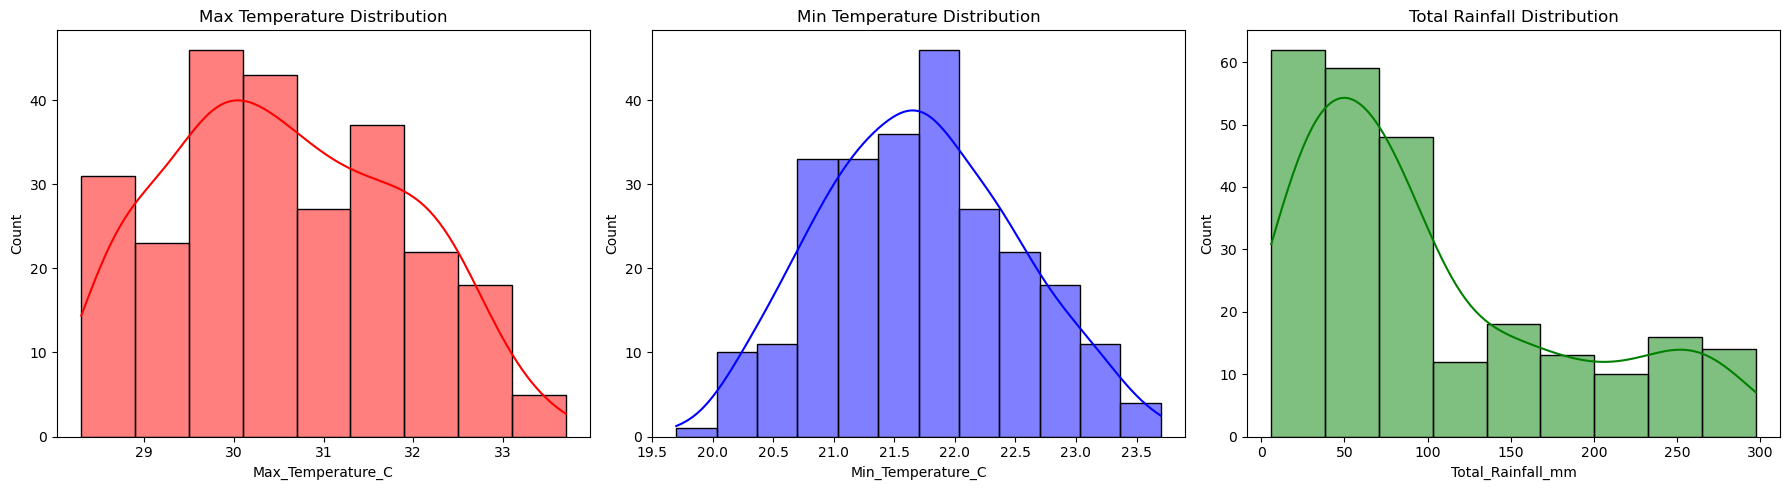

In [5]:
plt.figure(figsize=(18, 5))

# Max Temperature
plt.subplot(1, 3, 1)
sns.histplot(df['Max_Temperature_C'], kde=True, color='red')
plt.title('Max Temperature Distribution')

# Min Temperature
plt.subplot(1, 3, 2)
sns.histplot(df['Min_Temperature_C'], kde=True, color='blue')
plt.title('Min Temperature Distribution')

# Total Rainfall
plt.subplot(1, 3, 3)
sns.histplot(df['Total_Rainfall_mm'], kde=True, color='green')
plt.title('Total Rainfall Distribution')

plt.tight_layout()
plt.show()

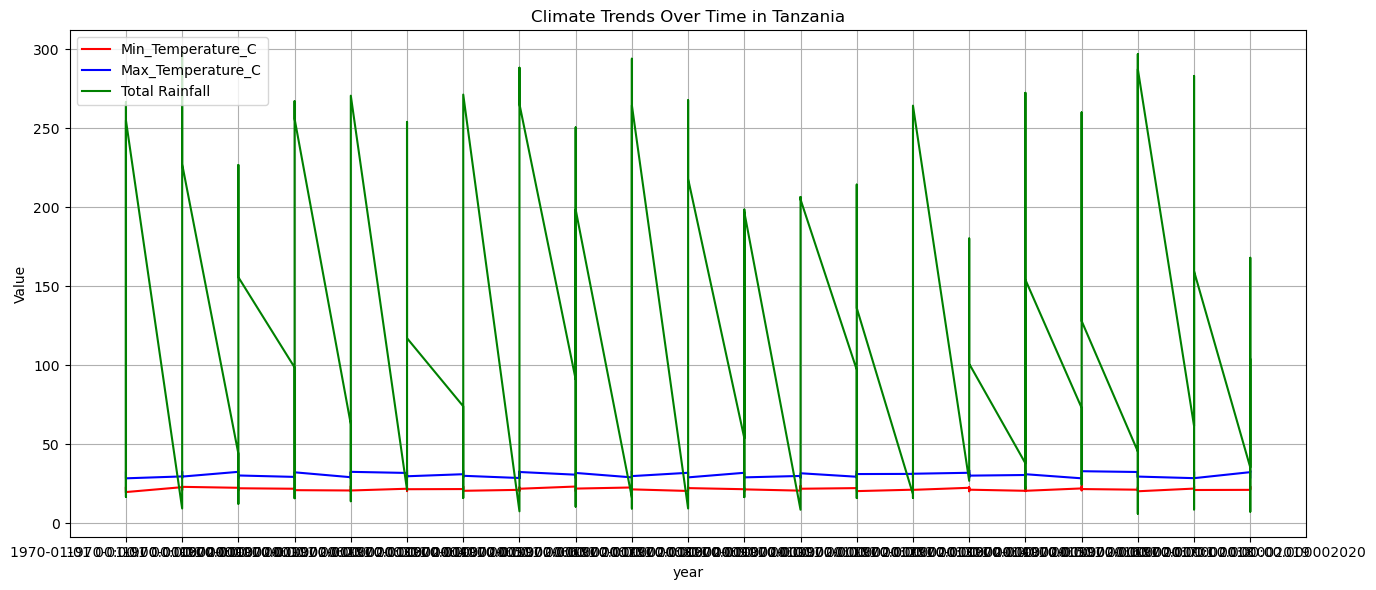

In [7]:
# Cell 5: Time Series Plots for Temperature and Rainfall
plt.figure(figsize=(14, 6))

plt.plot(df['Year'], df['Min_Temperature_C'], label='Min_Temperature_C', color='red')
plt.plot(df['Year'], df['Max_Temperature_C'], label='Max_Temperature_C', color='blue')
plt.plot(df['Year'], df['Total_Rainfall_mm'], label='Total Rainfall', color='green')

plt.xlabel('year')
plt.ylabel('Value')
plt.title('Climate Trends Over Time in Tanzania')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Year                      object
Month                      int64
Average_Temperature_C    float64
Total_Rainfall_mm        float64
Max_Temperature_C        float64
Min_Temperature_C        float64
year                       int64
month                      int64
dtype: object


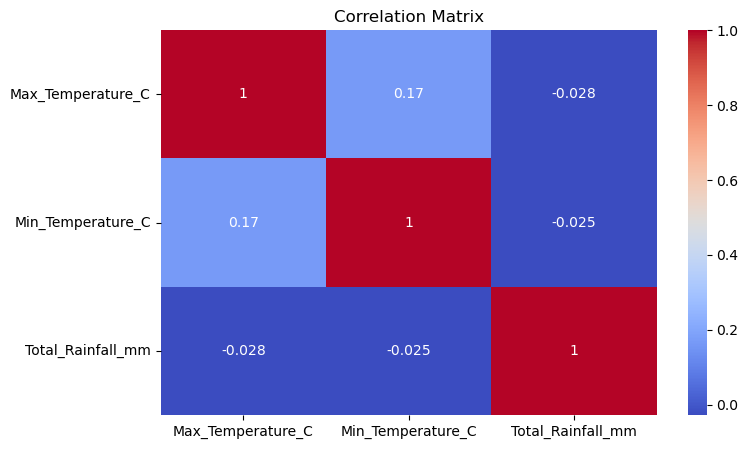

In [8]:
# Step 1: To Check and confirm datatypes
print(df.dtypes)

# Step 2:To Force convert the relevant numeric columns (optional but safe)
df['Max_Temperature_C'] = pd.to_numeric(df['Max_Temperature_C'], errors='coerce')
df['Min_Temperature_C'] = pd.to_numeric(df['Min_Temperature_C'], errors='coerce')
df['Total_Rainfall_mm'] = pd.to_numeric(df['Total_Rainfall_mm'], errors='coerce')

# Step 3: To Select numeric columns only
numeric_df = df[['Max_Temperature_C', 'Min_Temperature_C', 'Total_Rainfall_mm']]  # explicitly define to be safe

# Step 4:To Drop rows with missing values just in case
numeric_df = numeric_df.dropna()

# Step 5: To Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Create average temperature
df['avg_temp'] = (df['Max_Temperature_C'] + df['Min_Temperature_C']) / 2

# Convert 'Year' column to numeric (if it's a date)
df['year'] = pd.to_datetime(df['Year'], errors='coerce').dt.year

# Define Features (X) and Target (y)
features = ['year', 'Total_Rainfall_mm']
X = df[features]
y = df['avg_temp']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.93
RMSE: 1.19
